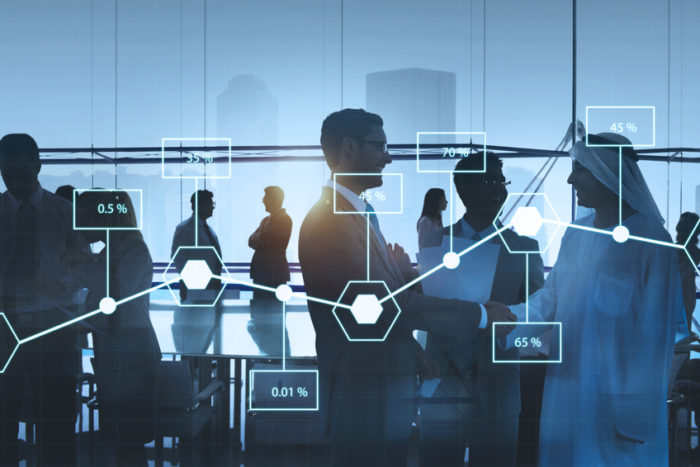

**Hello, I am Liam Patrick D. Rozario. This was my first Data Science Task using some different python Libraries. In here I worked with a dataset of employees of a company. Where some of the employees suddenly left their job. So, Here, I tried to analyse with some features and what actually the main impactful features that 'why the employees lefting the job? and the statistical differences between those who are lefting and retaining the job'.So, At last I build a model by which we can give some values to our selected impactful features to predict that a employee is going to retain the job or left the job.**

## **So, Lets start...**

* At First I imported some basic Python libraries which I will need through out my my project.

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files


* Then I imported my dataset.

In [41]:

uploaded = files.upload()


Saving Employee_data.csv to Employee_data (1).csv


In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Employee_data.csv']))

* After Imported the dataset. We can see individual columns columns are refelecting individual values. As example we can see: *Satisfaction_level,time_spend_company, Department, avaerage_monthly_hours, Salary*, left etc. Where satisfaction levels stataes tnat the satisfaction of employees, salary states the salary scale of an employee, average monthly hours reflects each monthly hours a employee has for a certain period, Department shows the department of an employee etc.But this columns we will find a Column which is showing 'LEFT'. This columns states that the employee left the job or not. So, Here o means He/She retained the job and 1 means he/she left the job. So, By now we can understand the left column is our dependent feature of our dataset. Because after all of the information we can analysis that- Having the opportunities the employee left the job or retained the job.

In [43]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


* We have 14999 rows or I can say we have 14999 records in our dataset.Where 2 columns has string values, 2 has float values and the rest has integer values.

In [44]:
len(df)

14999

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* I just checked how many employees retained the job and how many of them left by using value_counts():

In [46]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

* Now I just tried to analysis the whole thing to split the groups into two section one is por left and another is for retained employees. Here we can see the avg of each fetaures regarding to left and retained. And tried to find out the difference.

* Where we can see Those who had less working hoour in each month. Good satisfaction level and had promotions over last five years, less number of projects mostly retained the job. And if we see the  other differences the difference is very minimal. 

In [47]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [48]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


* Here I just tried to visualise some graphs about from salay range. here we can see. Those who has High salry- most of them retained the job. But Those who has low salary the didn’t retained the job. They left the company most. 

Text(0, 0.5, 'Employees')

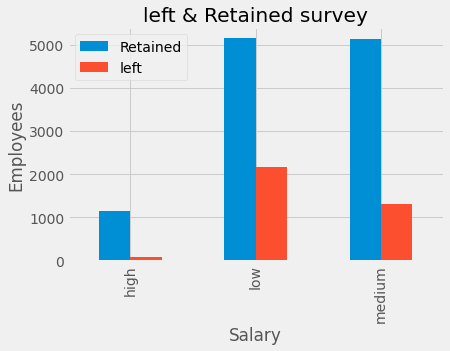

In [49]:
plt.style.use('fivethirtyeight')
pd.crosstab(df.salary,df.left).plot(kind='bar')

plt.legend(['Retained','left'])
plt.title('left & Retained survey')
plt.xlabel('Salary')
plt.ylabel('Employees')


* Here I tried to visualise - From which Department the most of the employees retaining their job.

Text(0, 0.5, 'Employees')

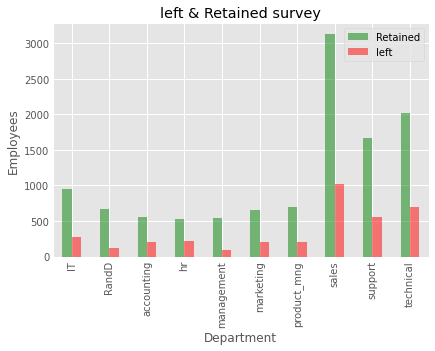

In [50]:
plt.style.use('ggplot')
color=['Green','Red']
pd.crosstab(df.Department,df.left).plot(kind='bar',color=color,alpha=0.50)

plt.legend(['Retained','left'])
plt.title('left & Retained survey')
plt.xlabel('Department')
plt.ylabel('Employees')


* So, We saw that from all of the features this features:'satisfaction_level','average_montly_hours','promotion_last_5years','salary' provieds more value to our dependent features. So, I created a new dataset only with this 4 features.

In [51]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

In [52]:
new_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


* Now we can see in our datset all of our values is in floats or integers only the Salary column has string values. So, By using one hot encoding I divided the 3 values HIGH, Medium and Low to Binary values. and then concated the values with our dataset. 


* The Main reason is doing One hot encoding cause. The ML model we are going to use don’t understand strings type variable. So, That’s why we used the technique to convert our string values to Binary numbers. So that our model can understand.

In [53]:
dummy=pd.get_dummies(new_df.salary,prefix='salary')

In [54]:
dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [55]:
df2=pd.concat([new_df,dummy],axis='columns')

In [56]:
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [57]:
df2.drop('salary',axis='columns',inplace=True)

In [58]:
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


* Here I put the left column into a variable y and our newly created dataset as X. And Trained the whole data where the test size is 30% of the total dataset.

In [59]:
X=df2

In [60]:
y=df.left

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

* 10499 is our number of trained value and 4500 is our number of test value.

In [63]:
len(X_train)

10499

In [64]:
len(X_test)

4500

In [65]:
X_train.tail()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11758,0.58,206,1,1,0,0
13095,0.67,254,0,0,1,0
8823,0.75,181,0,0,1,0
13567,0.53,223,0,0,1,0
10400,0.83,186,0,0,0,1


In [66]:
X_test.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
10965,0.66,169,0,0,1,0
12549,0.41,138,0,0,1,0
13416,0.77,153,0,0,0,1
8880,0.80,247,0,0,0,1
1201,0.10,252,0,0,0,1


* Then I imported Logistic Regression from skelearn as a ML-model. and fitted our trained and test data.

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
model=LogisticRegression()

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
model.predict(X_train)

array([1, 0, 0, ..., 0, 0, 0])

* Here We put some random values. to see how our model predicts. Where our first value is Satisfactory level, Then avg. monthly hours, then last 5 years promotions and the salaries as binary.

In [71]:
model.predict([[0.21,50,0,0,1,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [72]:
model.predict([[0.41,50,0,1,0,0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

* Here we can see the accuracy of our model. we can see the model is predicting with a good percentage of 78. 

In [73]:
model.score(X,y)

0.7768517901193412

* Then we know that our model has a lot of parameters. So, For the accuracy we have now its basically the default parameters. If we choose our parameters and want to see which parameters gives us the best accuracy. Then we can use a technique call Hyper Parameter Tuning. By which we can find the best parameters for our dataset in the ML-model. which will give us better accuracy.

In [74]:
import numpy as np

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500,5000]
    }
]

In [75]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [76]:
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

* This will be the best parameters for our dataset for this model.

In [77]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=1000, penalty='l1',
                   solver='saga')

* So here, We can see our best parameters will give us an accuracy which is around 80%.

In [78]:
print (f'Accuracy : {best_clf.score(X,y):.3f}')

Accuracy : 0.796


**That's actually all for this project. Hope you will like it.**

# **Thank you. 🎈**